# CREDIT SCORE CLASSIFICATION PROJECT !!!

## Introduction

In today’s financial landscape, accurate and efficient credit risk assessment is critical for banks, lenders, and other financial institutions to make informed decisions regarding loan approvals, credit limits, and other financial products. The traditional methods of evaluating creditworthiness involve manual processes, which are often time-consuming, inconsistent, and prone to human error. Therefore, there is a growing need for data-driven approaches to automate the credit scoring process, making it faster, more consistent, and accurate.

This project focuses on developing a machine learning model designed to predict an applicant's credit score based on various financial and personal attributes. The aim is to automate the credit score classification process, helping financial institutions streamline their decision-making and reduce the risk of defaults. By leveraging historical data and advanced machine learning techniques, such as Random Forest and XGBoost, this project seeks to provide more accurate and reliable credit score predictions.

Through exploratory data analysis (EDA), feature engineering, and model evaluation, this project will also explore the most important factors influencing credit scores, offering valuable insights that can inform better credit risk management practices. Ultimately, the model will improve efficiency, consistency, and customer satisfaction by enabling faster and more reliable credit decisions.

By automating the credit risk assessment process and providing deeper insights into credit factors, this model aims to support financial institutions in reducing operational costs, enhancing decision accuracy, and fostering a better customer experience.


## THE WORK FLOW OF THE PROJECT IS GIVEN BELOW :

Data Collection and Understanding

Data Preprocessing

Exploratory Data Analysis (EDA)

Feature Engineering

Model Selection

Performance Evaluation

Visualization

Reporting

Deployment

 ## Project Goal

The main goal of this project is to build a machine learning model that can accurately classify individuals based on their credit score (e.g., Good, Standard, or Poor), using personal and financial data..

Key Goals:

Automate credit score evaluation

Make faster and more reliable lending decisions

Reduce the risk of loan defaults

Improve overall efficiency and customer experience in credit assessment process

### Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train..csv', low_memory=False)


In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


###  Data Cleaning 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.shape

(100000, 28)

In [6]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
(df.isnull().sum()/df.shape[0])*100    

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [8]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [10]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                        1408
Credit-Builder Loan                                                                                  1280
Personal Loan                                                                                        1272
Debt Consolidation Loan                                                                              1264
Student Loan                                                                                         1240
                                                                                                     ... 
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan       8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                         8
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan                                                   8
Payday Loan, Student Loan, Mortga

In [11]:
df['Credit_Mix'].value_counts()


Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [12]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [13]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [14]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [15]:
df.dropna(inplace=True)     

In [16]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [17]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000
mean,4024.502617,16.842806,22.787253,76.272352,21.994119,27.062866,32.219031,1445.924761
std,3094.967739,115.605025,129.339640,479.226709,15.220406,187.185825,5.057398,8407.429893
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837
25%,1575.345833,4.000000,4.000000,8.000000,10.000000,3.000000,28.046338,41.244418
50%,2991.016667,6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.418272
75%,5712.553333,8.000000,7.000000,22.000000,29.000000,9.000000,36.408991,169.286269
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,49.564519,82331.000000


In [18]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


## Exploratory Data Analysis (EDA)

### Histogram Plot

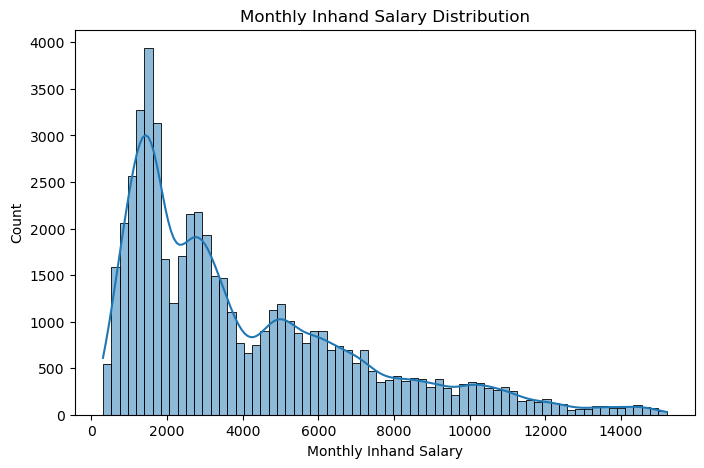

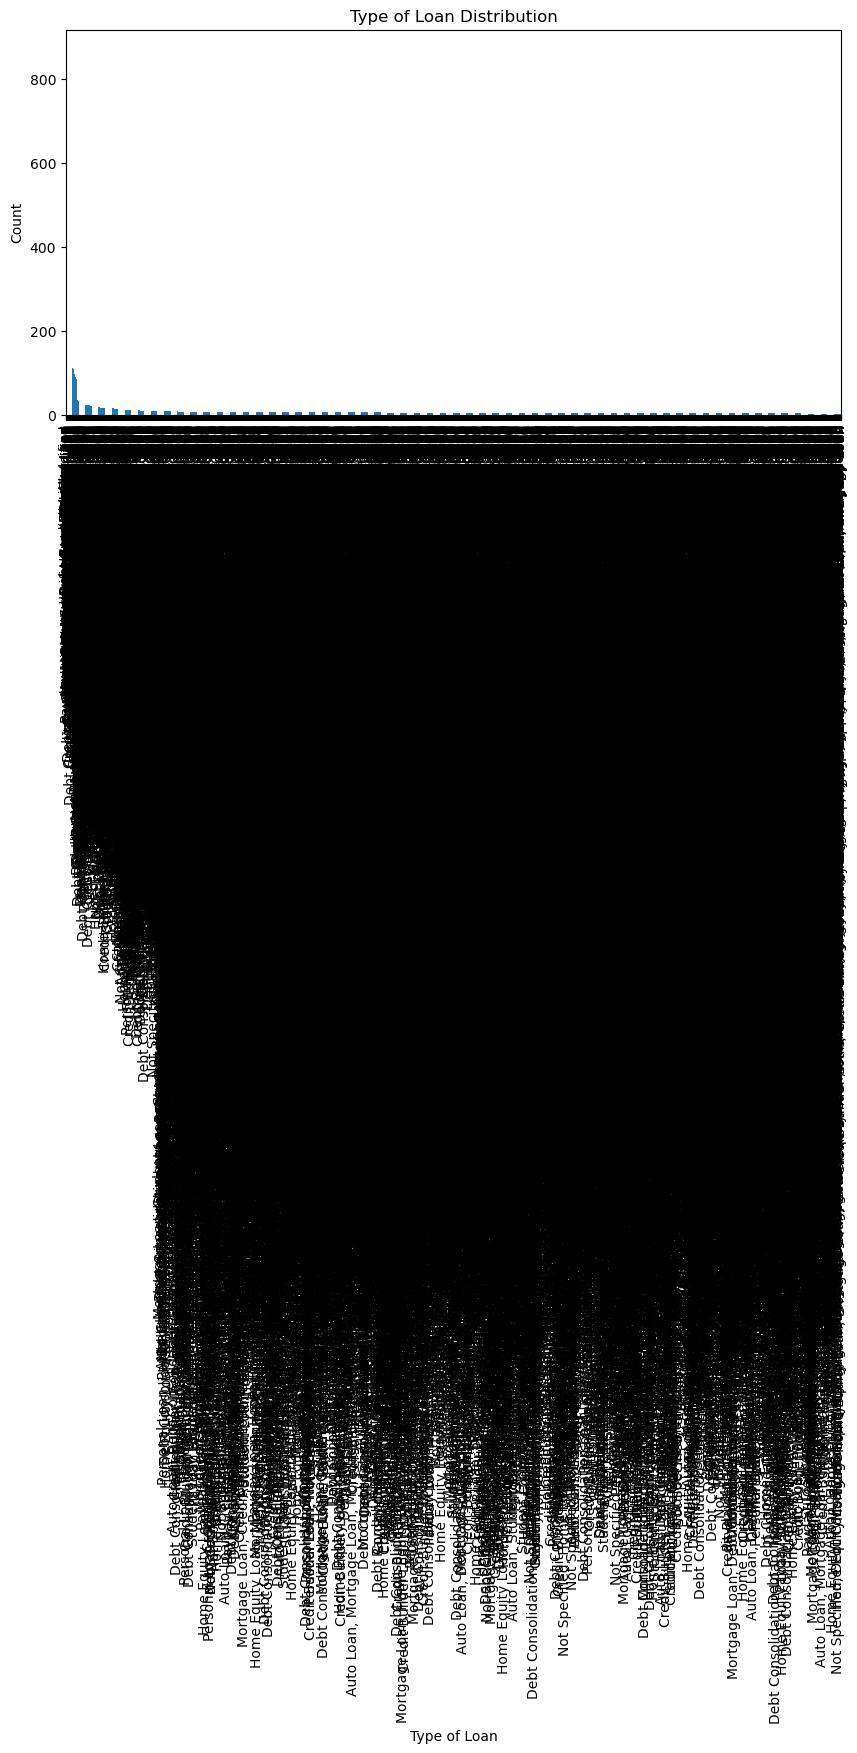

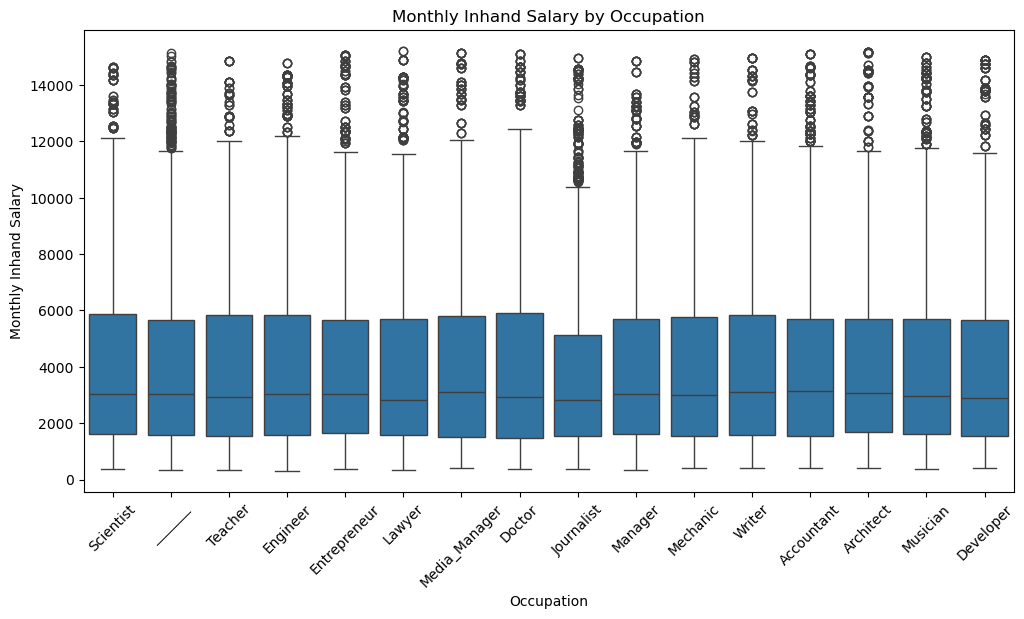

In [19]:


# Histogram for a numerical column
plt.figure(figsize=(8, 5))
sns.histplot(df['Monthly_Inhand_Salary'], kde=True)
plt.title("Monthly Inhand Salary Distribution")
plt.xlabel("Monthly Inhand Salary")
plt.ylabel("Count")
plt.show()

# Bar plot for a categorical column
plt.figure(figsize=(10, 5))
df['Type_of_Loan'].value_counts().plot(kind='bar')
plt.title("Type of Loan Distribution")
plt.xlabel("Type of Loan")
plt.ylabel("Count")
plt.show()

# Box plot for salary by occupation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Monthly_Inhand_Salary')
plt.title("Monthly Inhand Salary by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Monthly Inhand Salary")
plt.xticks(rotation=45)
plt.show()


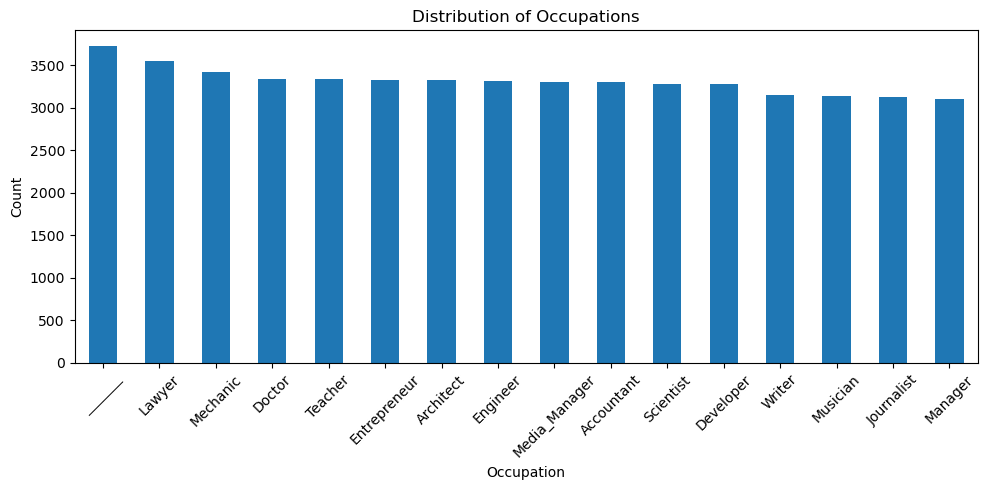

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\1377751831.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


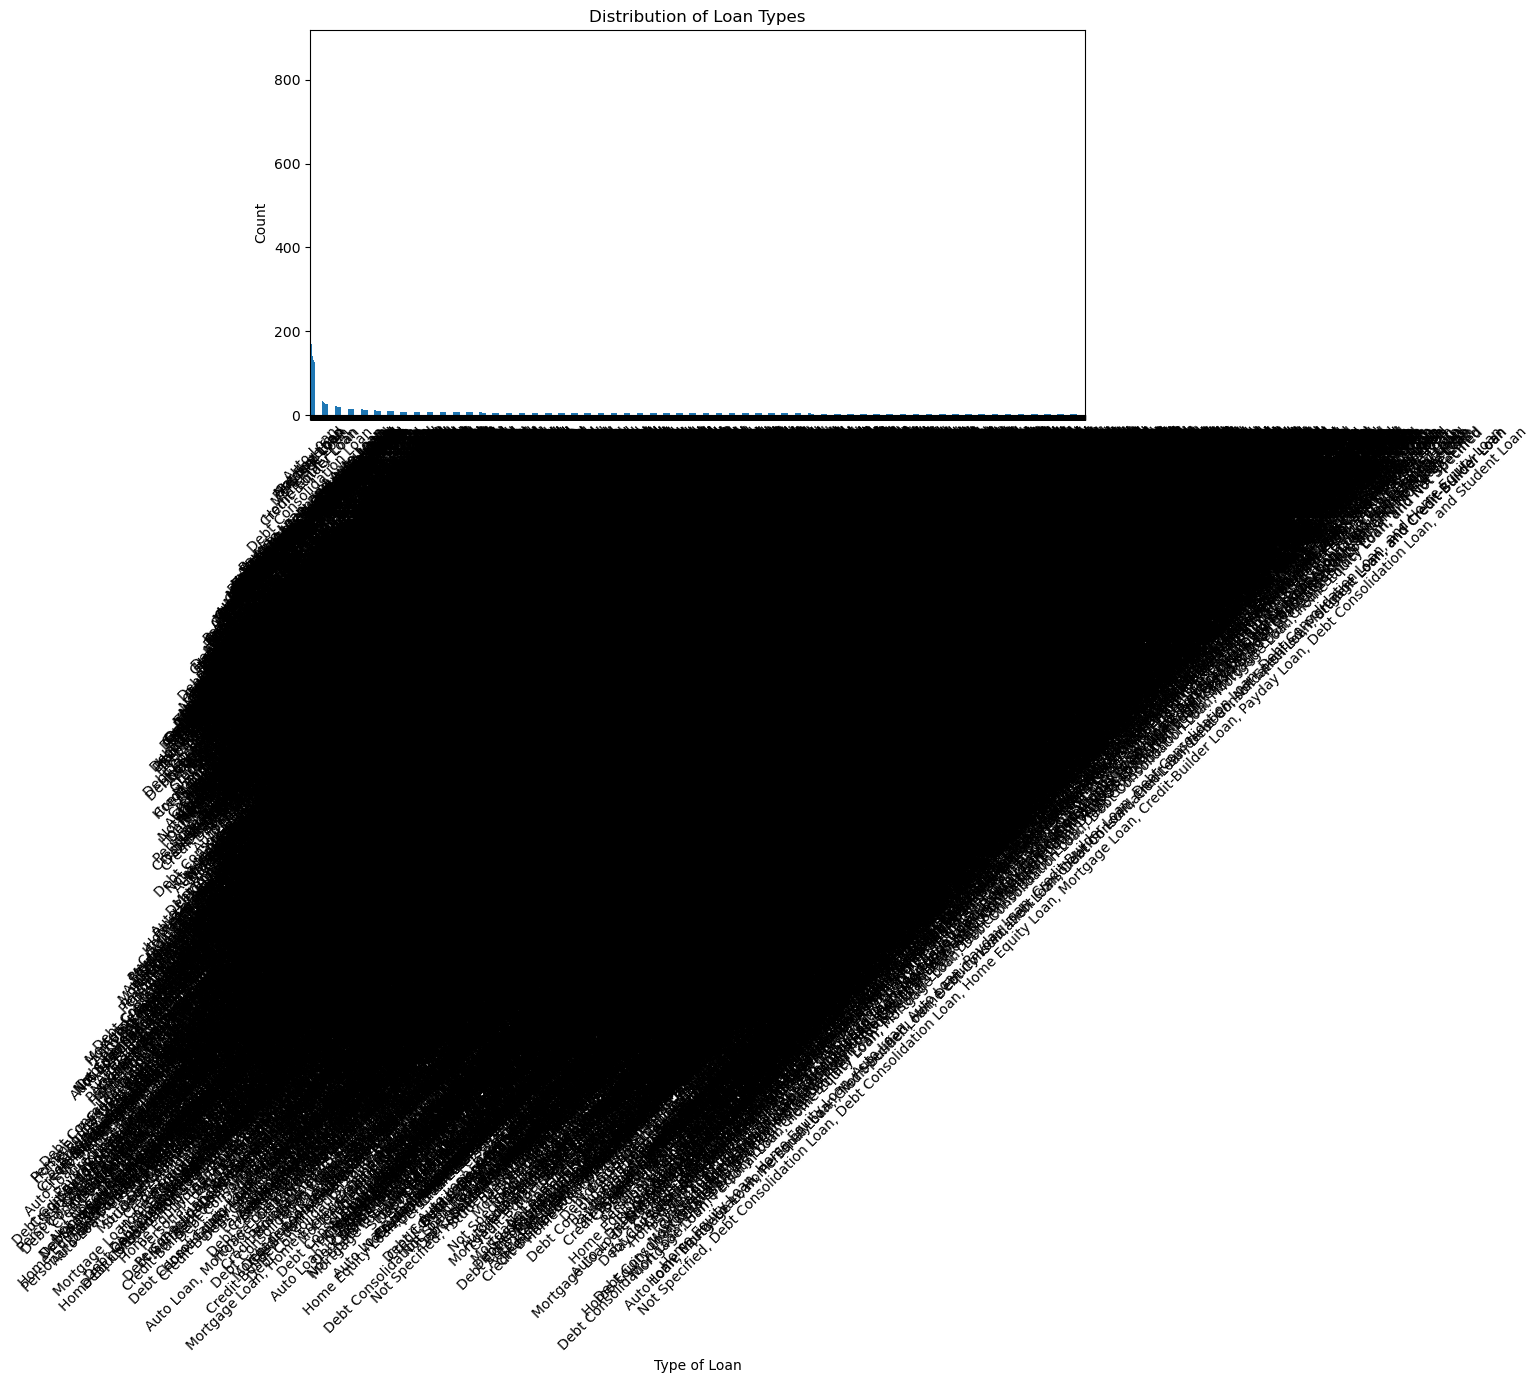

In [20]:
    import matplotlib.pyplot as plt
    
    # Bar plot for Occupation
    plt.figure(figsize=(10, 5))
    df['Occupation'].value_counts().plot(kind='bar')
    plt.title("Distribution of Occupations")
    plt.xlabel("Occupation")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Bar plot for Type_of_Loan
    plt.figure(figsize=(10, 5))
    df['Type_of_Loan'].value_counts().plot(kind='bar')
    plt.title("Distribution of Loan Types")
    plt.xlabel("Type of Loan")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


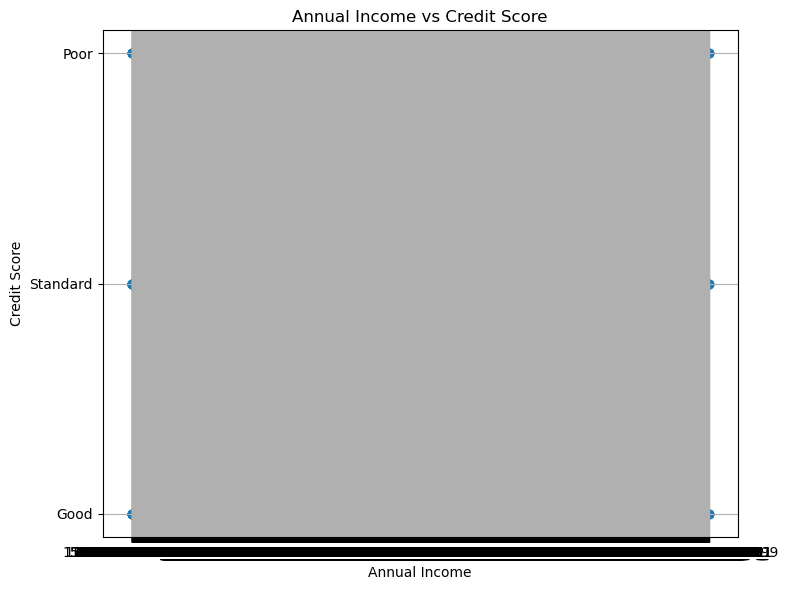

In [21]:


plt.figure(figsize=(8, 6))
plt.scatter(df['Annual_Income'], df['Credit_Score'], alpha=0.5)
plt.title("Annual Income vs Credit Score")
plt.xlabel("Annual Income")
plt.ylabel("Credit Score")
plt.grid(True)
plt.tight_layout()
plt.show()


### Count Plot

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\4023166164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


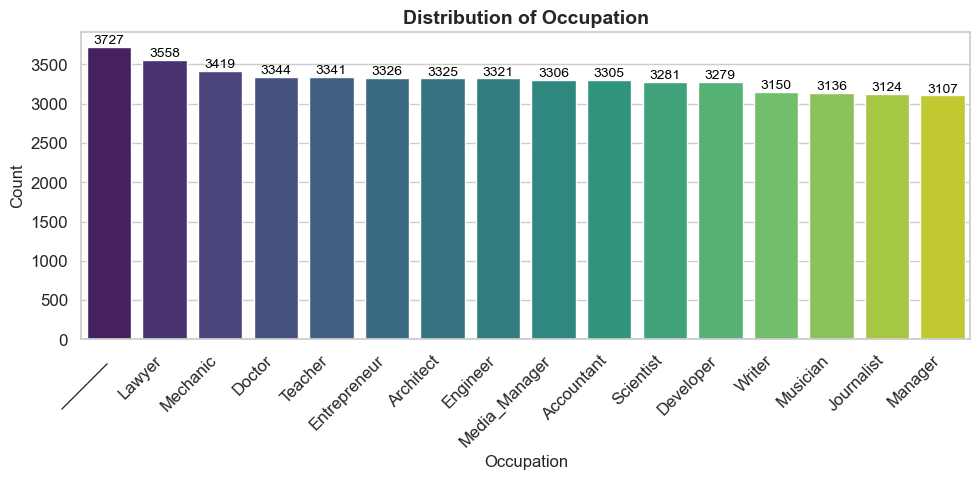

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\4023166164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\4023166164.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


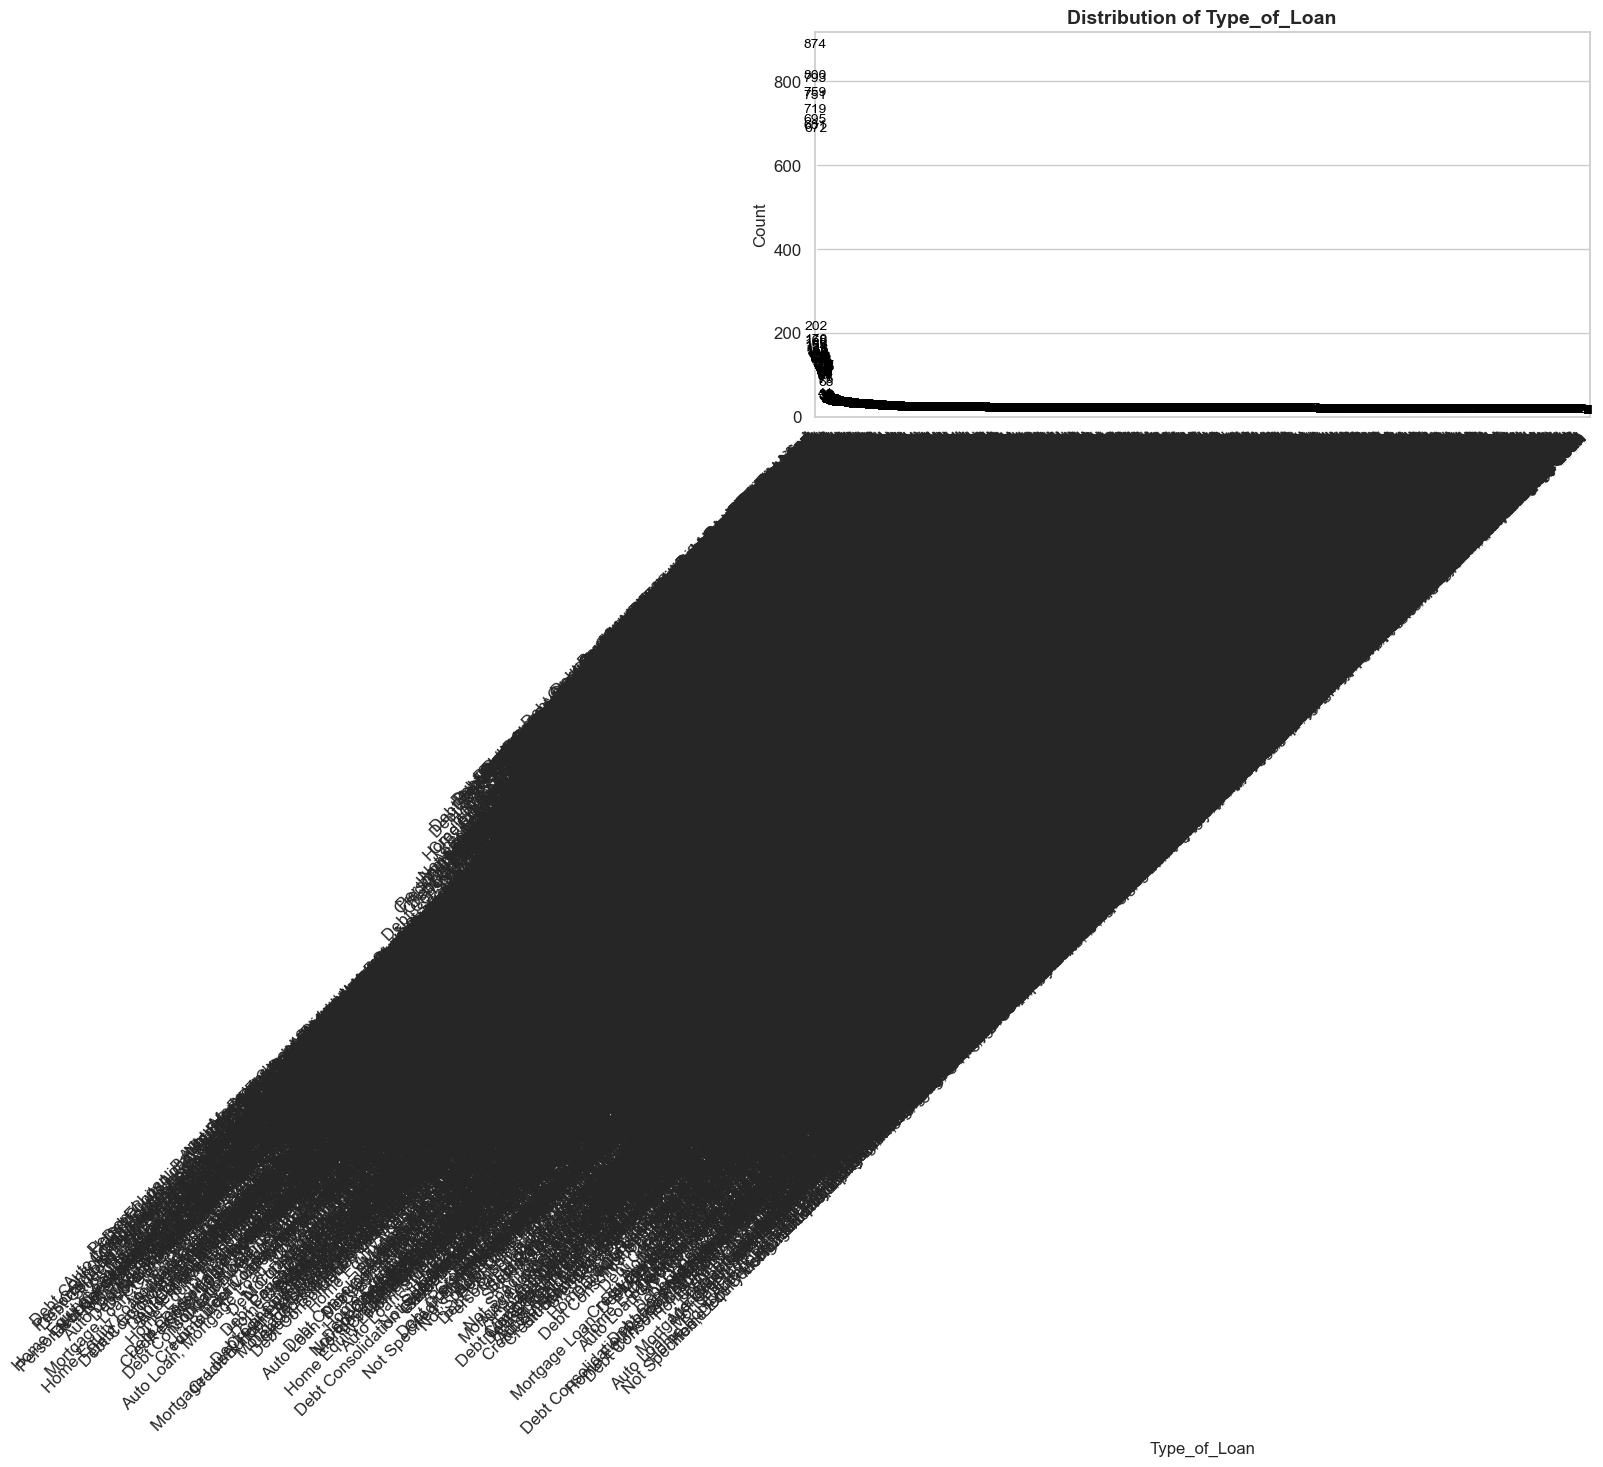

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\4023166164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


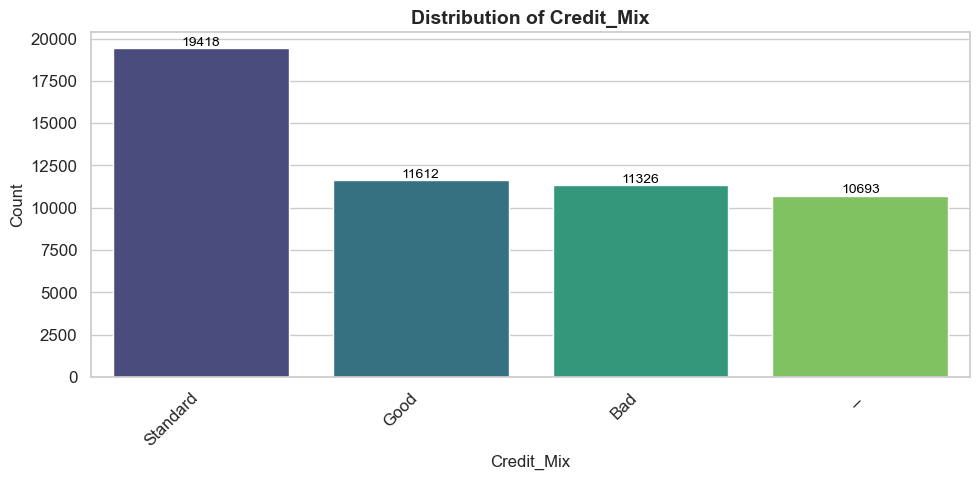

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\4023166164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


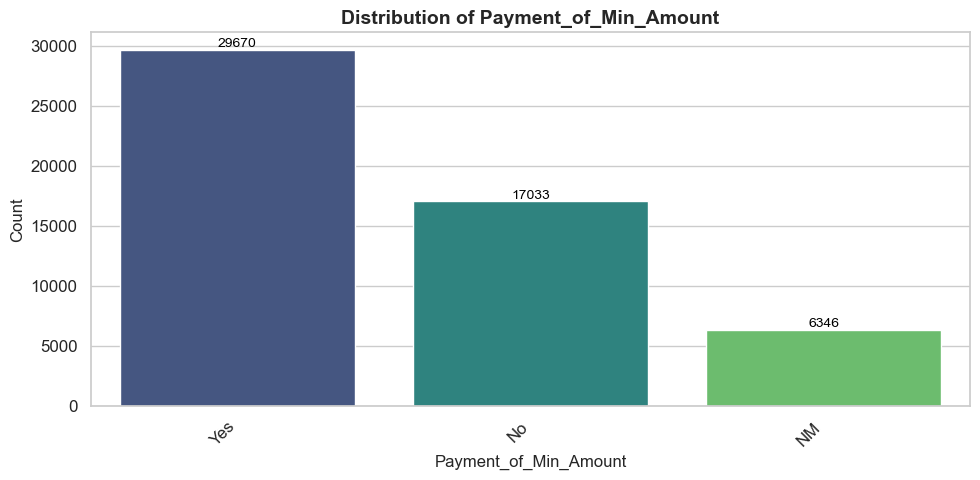

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\4023166164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


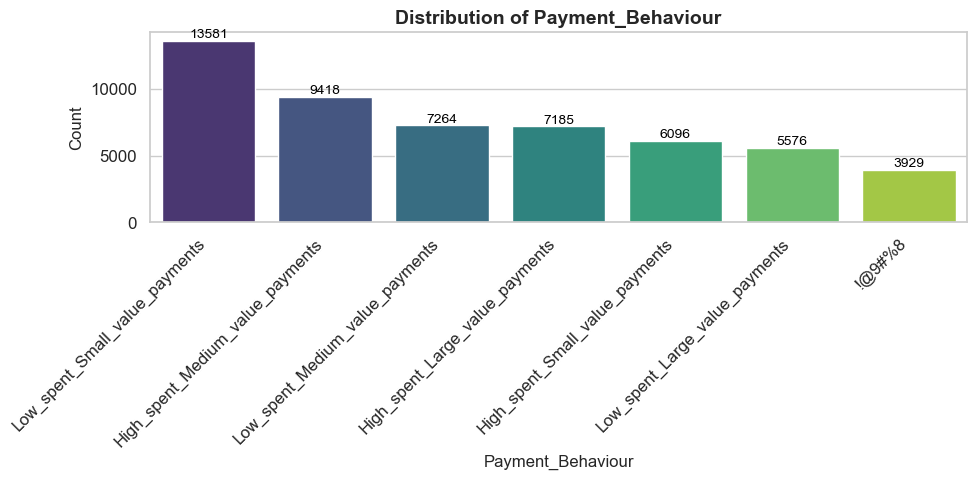

In [22]:

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# List of categorical columns
categorical_cols = ['Occupation', 'Type_of_Loan', 
                    'Credit_Mix', 'Payment_of_Min_Amount', 
                    'Payment_Behaviour']

# Plot count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}", fontsize=14, weight='bold')
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Show exact counts on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', rotation=0)
    
    plt.tight_layout()
    plt.show()


### Box Plot

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\3060717858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Credit_Score', palette="Set2")


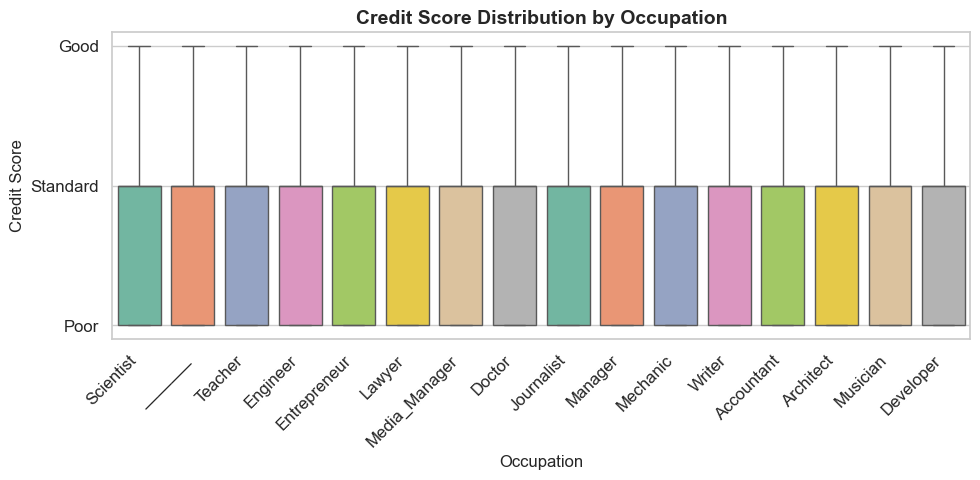

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\3060717858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Credit_Score', palette="Set2")
C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\3060717858.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


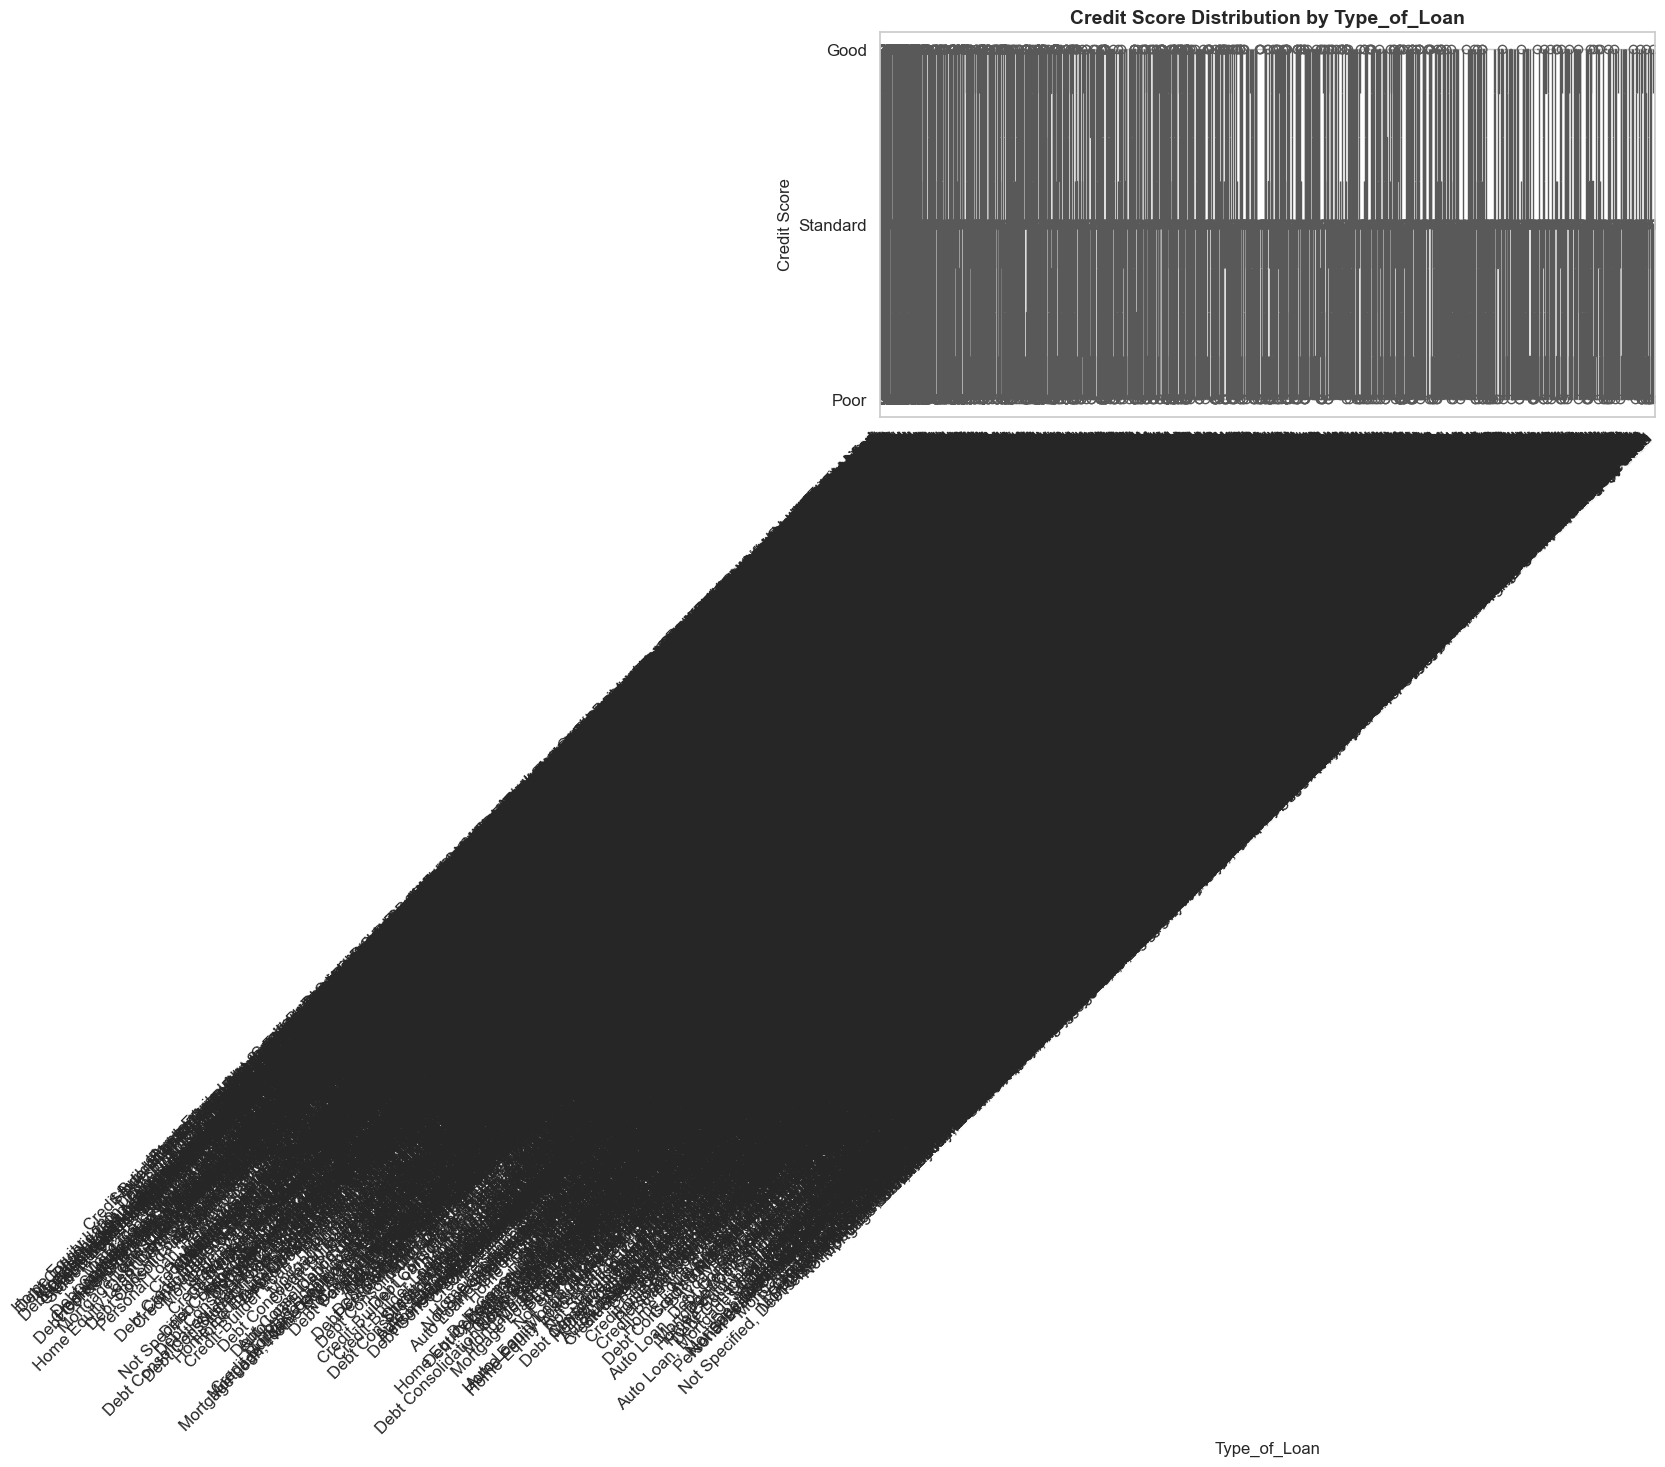

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\3060717858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Credit_Score', palette="Set2")


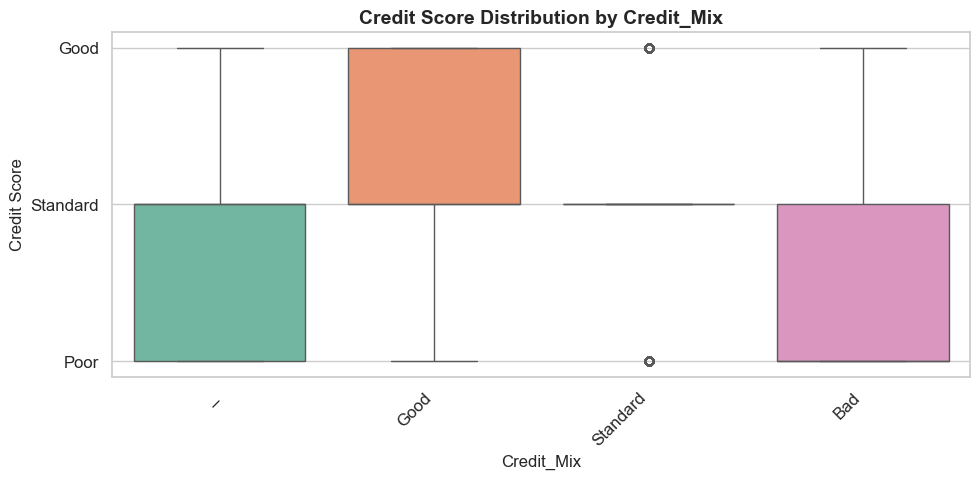

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\3060717858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Credit_Score', palette="Set2")


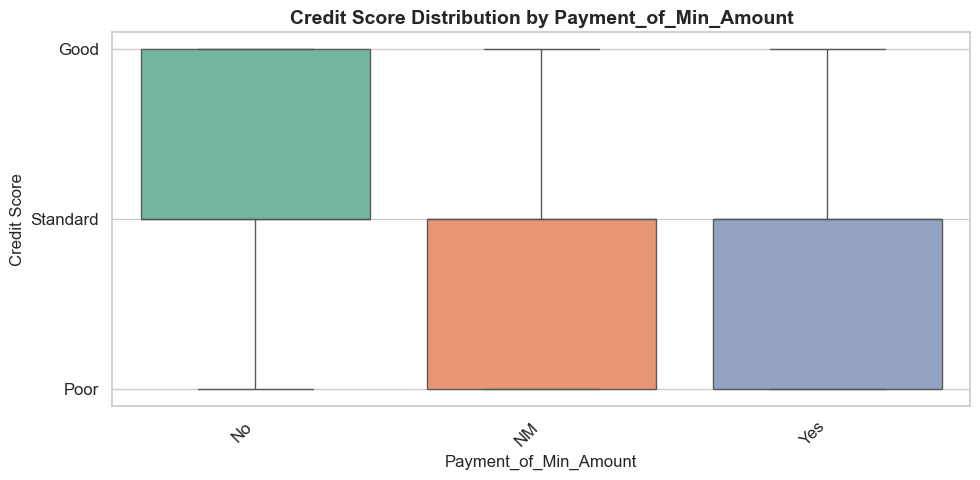

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\3060717858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Credit_Score', palette="Set2")


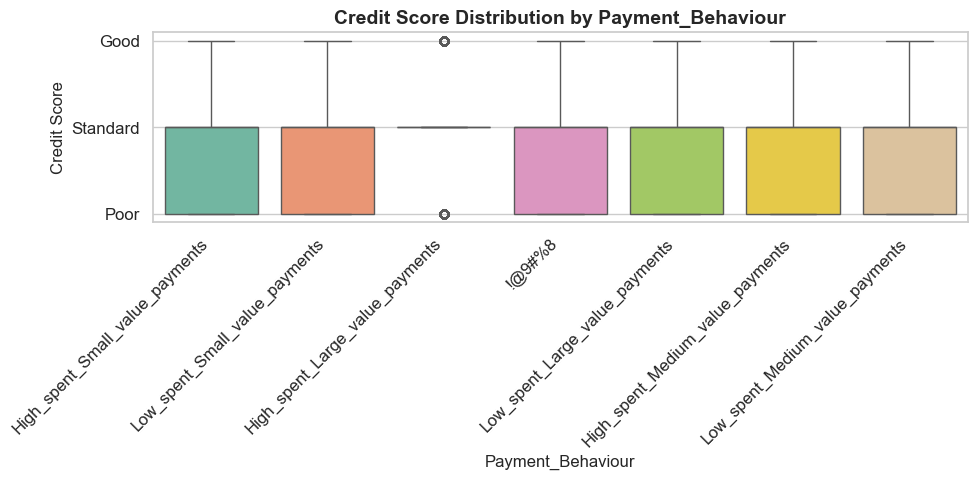

In [23]:

# Set style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# List of categorical columns
categorical_cols = ['Occupation', 'Type_of_Loan', 
                    'Credit_Mix', 'Payment_of_Min_Amount', 
                    'Payment_Behaviour']

# Loop through categorical columns and plot boxplots
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='Credit_Score', palette="Set2")
    
    plt.title(f"Credit Score Distribution by {col}", fontsize=14, weight='bold')
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Credit Score", fontsize=12)
    
    plt.tight_layout()
    plt.show()


### Box Plot

C:\Users\nayan\AppData\Local\Temp\ipykernel_4476\1443323107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Occupation', y='Credit_Score', palette="Set2")


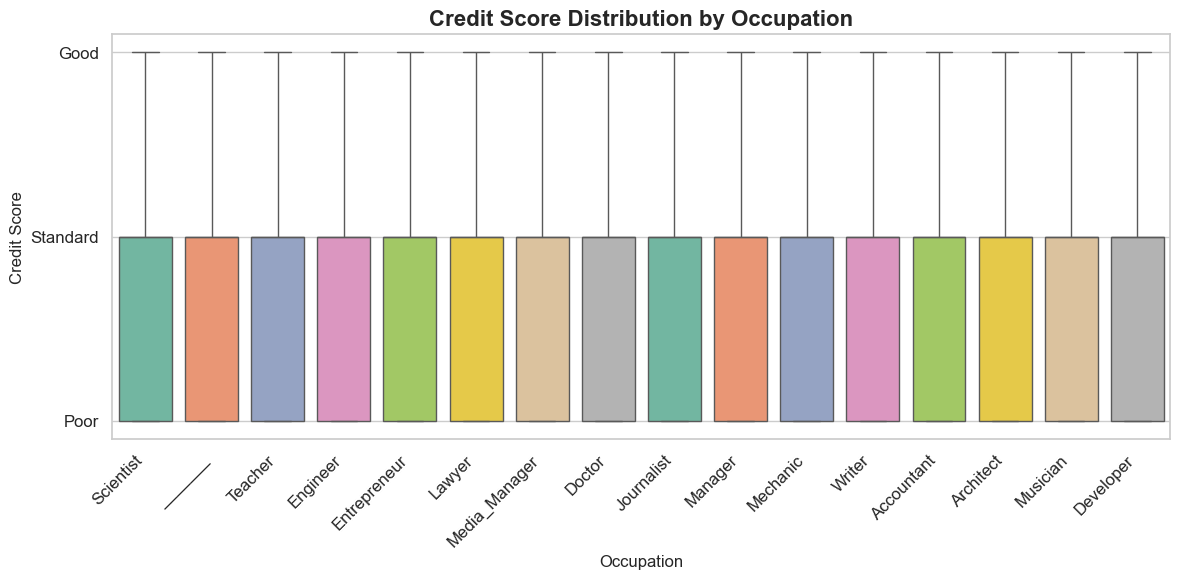

In [24]:

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(12, 6))

# Boxplot for Credit Score by Occupation
sns.boxplot(data=df, x='Occupation', y='Credit_Score', palette="Set2")

plt.title("Credit Score Distribution by Occupation", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Credit Score", fontsize=12)

plt.tight_layout()
plt.show()


### Count Plot

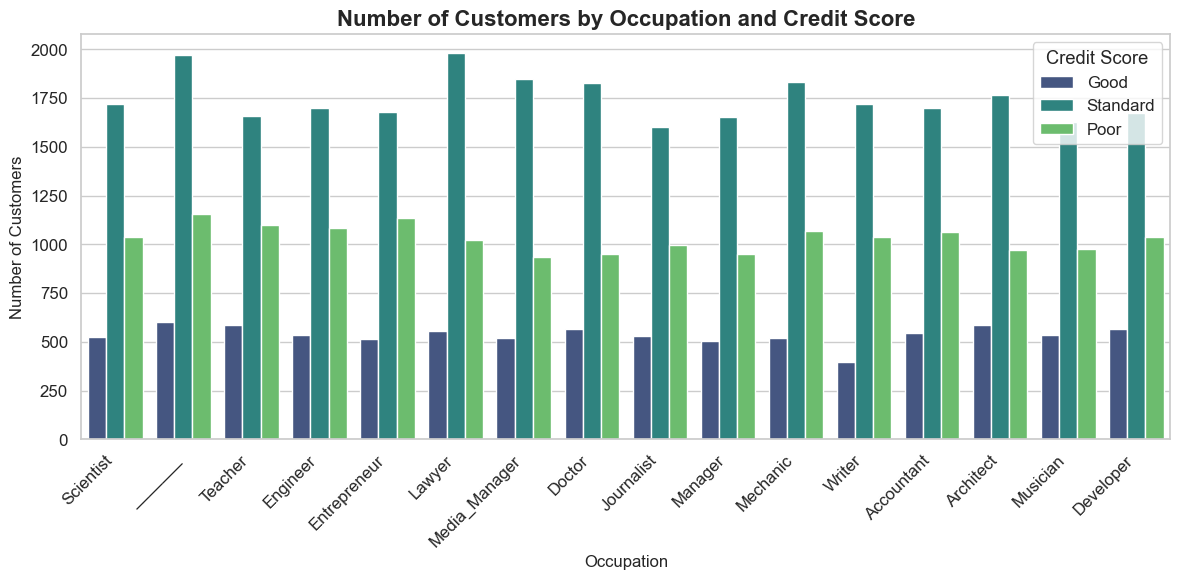

In [25]:


# Set style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

plt.figure(figsize=(12, 6))

# Countplot: number of customers by Occupation and Credit Score
sns.countplot(data=df, x='Occupation', hue='Credit_Score', palette="viridis")

plt.title("Number of Customers by Occupation and Credit Score", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.legend(title="Credit Score")
plt.tight_layout()
plt.show()


### Count Plot

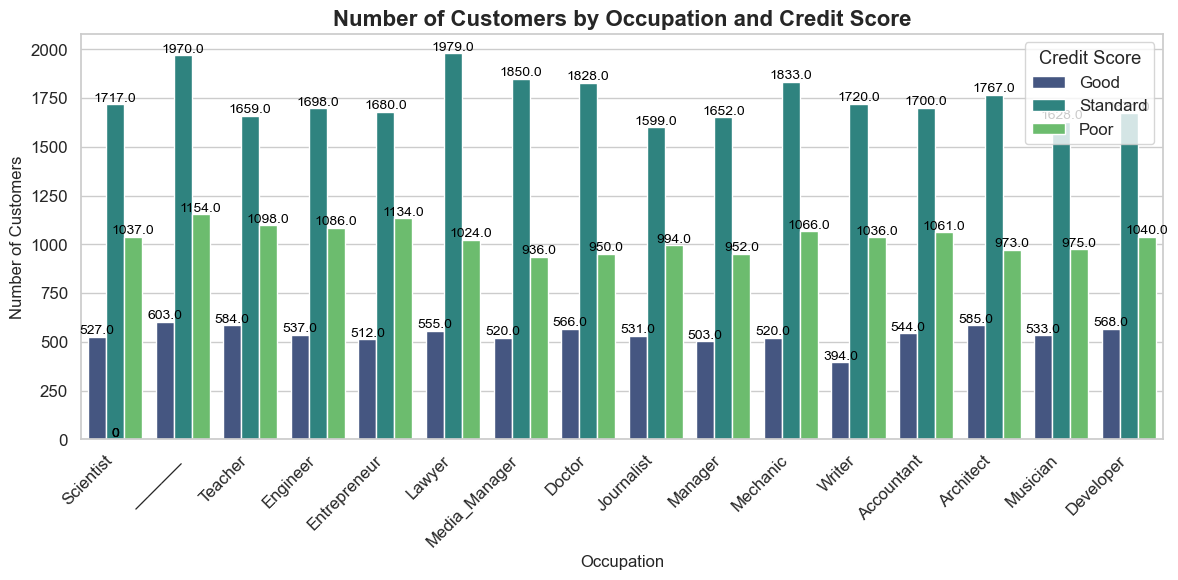

In [26]:

# Set style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

plt.figure(figsize=(12, 6))

ax = sns.countplot(data=df, x='Occupation', hue='Credit_Score', palette="viridis")

plt.title("Number of Customers by Occupation and Credit Score", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title="Credit Score")
plt.tight_layout()
plt.show()


### Correlation Heatmap

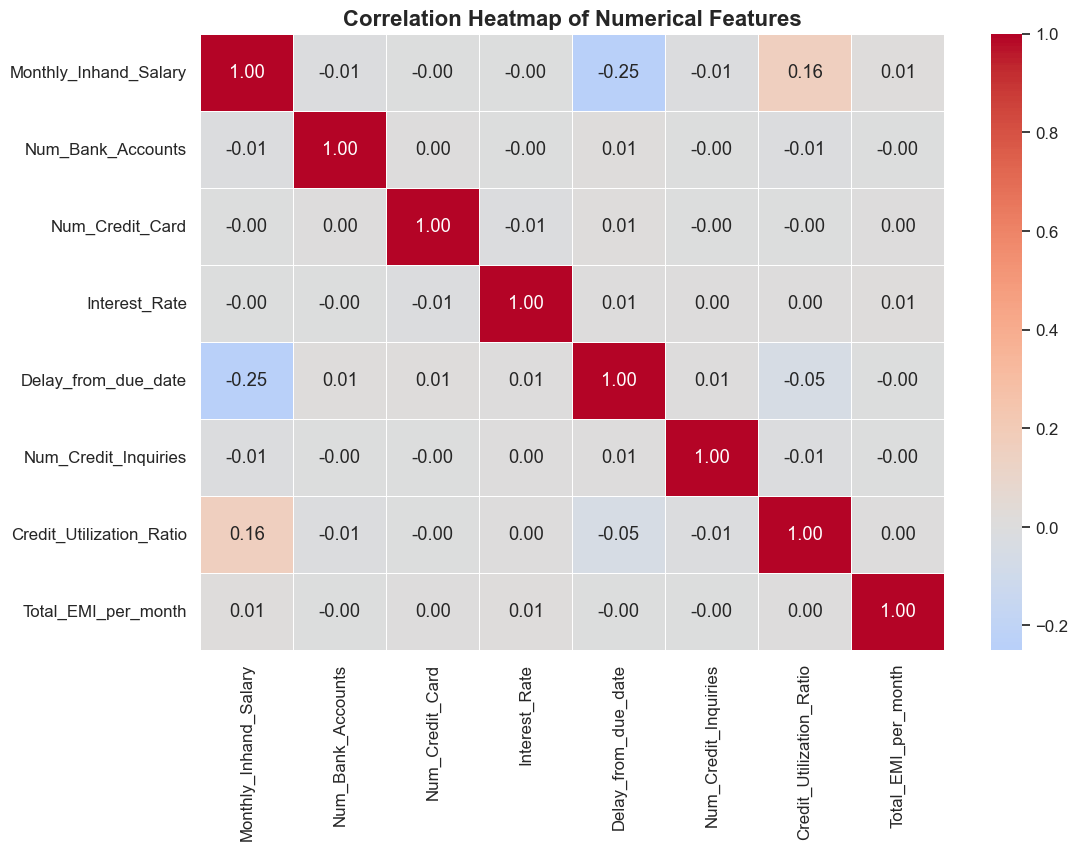

In [27]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16, weight='bold')
plt.show()


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Train-test Split               

Logistic Regression Model Train and test

In [29]:


# ---------------------------
# Step 1: Define features & target
# ---------------------------
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Encode target if it's categorical (Good/Average/Poor)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# ---------------------------
# Step 2: Handle categorical features
# ---------------------------
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns

# Preprocess: One-hot encode categorical, scale numeric
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# ---------------------------
# Step 3: Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# Step 4: Logistic Regression Model
# ---------------------------
log_reg = LogisticRegression(max_iter=1000)

# Build pipeline
from sklearn.pipeline import Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', log_reg)])

# Fit model
clf.fit(X_train, y_train)

# ---------------------------
# Step 5: Evaluate
# ---------------------------
y_pred = clf.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 0.772478793590952

 Classification Report:
               precision    recall  f1-score   support

        Good       0.74      0.69      0.72      1717
        Poor       0.78      0.76      0.77      3303
    Standard       0.78      0.80      0.79      5590

    accuracy                           0.77     10610
   macro avg       0.77      0.75      0.76     10610
weighted avg       0.77      0.77      0.77     10610


Confusion Matrix:
 [[1193    7  517]
 [  18 2512  773]
 [ 403  696 4491]]


In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = clf.predict(X_test)

# ---------------------------
# 1️⃣ Accuracy as a small DataFrame
# ---------------------------
acc_df = pd.DataFrame({"Metric": ["Accuracy"],
                       "Value": [accuracy_score(y_test, y_pred)]})
display(acc_df)

# ---------------------------
# 2️⃣ Classification report as a DataFrame
# ---------------------------
report_dict = classification_report(
    y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()
display(report_df)

# ---------------------------
# 3️⃣ Confusion matrix as a DataFrame
# ---------------------------
cm = confusion_matrix(y_test, y_pred)

# Put row/column labels = class names
cm_df = pd.DataFrame(cm,
                     index=[f"Actual_{c}" for c in label_encoder.classes_],
                     columns=[f"Pred_{c}" for c in label_encoder.classes_])
display(cm_df)


,Metric,Value
0,Accuracy,0.772479


,precision,recall,f1-score,support
Good,0.739157,0.694817,0.716301,1717.000000
Poor,0.781337,0.760521,0.770789,3303.000000
Standard,0.776855,0.803399,0.789904,5590.000000
accuracy,0.772479,0.772479,0.772479,0.772479
macro avg,0.765783,0.752912,0.758998,10610.000000
weighted avg,0.772150,0.772479,0.772042,10610.000000


,Pred_Good,Pred_Poor,Pred_Standard
Actual_Good,1193,7,517
Actual_Poor,18,2512,773
Actual_Standard,403,696,4491


## Model Training (Baseline + Advanced Models)


=== Logistic Regression ===
Accuracy: 0.7607917059377945

Classification Report:
              precision    recall  f1-score   support

        Good       0.71      0.67      0.69      1717
        Poor       0.78      0.73      0.76      3303
    Standard       0.76      0.80      0.78      5590

    accuracy                           0.76     10610
   macro avg       0.75      0.74      0.74     10610
weighted avg       0.76      0.76      0.76     10610



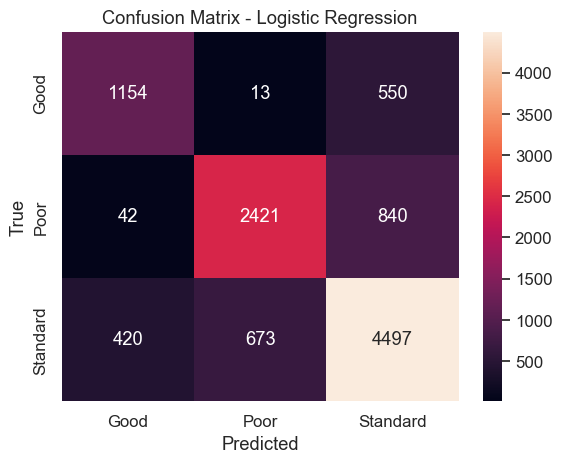


=== Random Forest ===
Accuracy: 0.5268614514608859

Classification Report:
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      1717
        Poor       0.00      0.00      0.00      3303
    Standard       0.53      1.00      0.69      5590

    accuracy                           0.53     10610
   macro avg       0.18      0.33      0.23     10610
weighted avg       0.28      0.53      0.36     10610



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


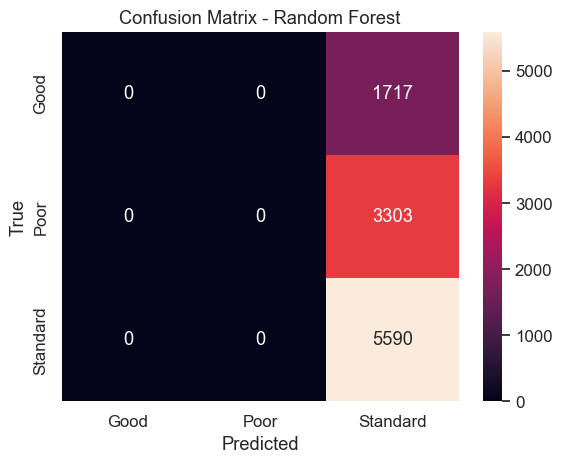

C:\Users\nayan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [17:49:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Accuracy: 0.6982092365692742

Classification Report:
              precision    recall  f1-score   support

        Good       0.60      0.65      0.63      1717
        Poor       0.66      0.76      0.71      3303
    Standard       0.76      0.68      0.72      5590

    accuracy                           0.70     10610
   macro avg       0.68      0.70      0.68     10610
weighted avg       0.70      0.70      0.70     10610



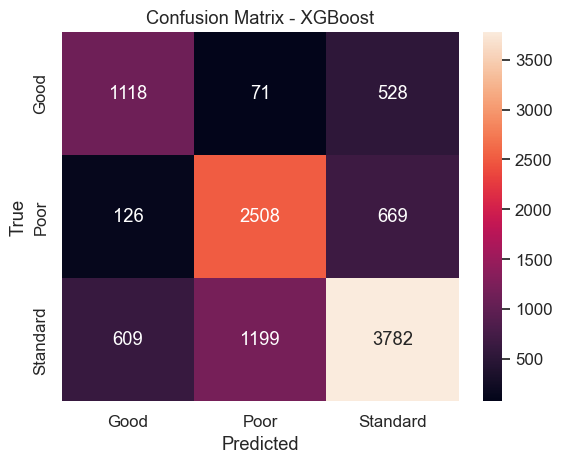


Summary Table:
                 Model  Test Accuracy
0  Logistic Regression       0.760792
1        Random Forest       0.526861
2              XGBoost       0.698209


In [44]:
# =======================
# 1. Imports
# =======================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier   # pip install xgboost if not already

# =======================
# 2. Prepare Data
# =======================
# drop ID-like columns
X = df.drop(['Credit_Score','ID','Customer_ID','Name','SSN'], axis=1, errors='ignore')
y = df['Credit_Score']

# Encode target if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Identify numeric and categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns

# Preprocessor: scale numeric + one-hot categorical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# 3. Models to compare
# =======================
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1,
                    max_depth=6, subsample=0.8, colsample_bytree=0.8,
                    eval_metric='mlogloss', use_label_encoder=False)

models = [
    ('Logistic Regression', log_reg),
    ('Random Forest', rf),
    ('XGBoost', xgb)
]

# =======================
# 4. Evaluate function
# =======================
def evaluate_models(models, X_train, X_test, y_train, y_test, class_names):
    results = []
    for name, model in models:
        # Build pipeline each time
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({'Model': name, 'Test Accuracy': acc})

        print(f"\n=== {name} ===")
        print("Accuracy:", acc)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=class_names))

        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    return pd.DataFrame(results)

# =======================
# 5. Run evaluation
# =======================
results_df = evaluate_models(models, X_train, X_test, y_train, y_test, class_names=label_encoder.classes_)
print("\nSummary Table:")
print(results_df)


In [8]:
print(df.columns)


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [9]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']


In [11]:
df = pd.read_csv('train..csv', low_memory=False)


In [14]:
print(df.dtypes)


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [15]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('Credit_Score', axis=1)  # replace with your target column
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.78855
Confusion Matrix:
 [[2521   20  986]
 [  82 4631 1161]
 [ 745 1235 8619]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      3527
           1       0.79      0.79      0.79      5874
           2       0.80      0.81      0.81     10599

    accuracy                           0.79     20000
   macro avg       0.78      0.77      0.78     20000
weighted avg       0.79      0.79      0.79     20000



###  Split features and target


In [17]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load dataset
df = pd.read_csv('train..csv', low_memory=False)  # Replace with your file name

# Step 3: Check column names
print("Columns in dataset:\n", df.columns)

# Step 4: Replace with your actual target column name
target_column = 'Credit_Score'  

# Step 5: Encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Step 6: Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Predict on test dataset
y_pred = model.predict(X_test)

# Step 10: Evaluate and report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 11: Print results
print("\n=== Test Accuracy ===")
print(f"Accuracy: {accuracy:.4f} → How many predictions were correct.")

print("\n=== Confusion Matrix ===")
print(conf_matrix, "\n→ Shows correct vs incorrect predictions in detail.")

print("\n=== Classification Report ===")
print(class_report, "→ Shows precision, recall, F1-score for each class.")


Columns in dataset:
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

=== Test Accuracy ===
Accuracy: 0.7885 → How many predictions were correct.

=== Confusion Matrix ===
[[2521   20  986]
 [  82 4631 1161]
 [ 745 1235 8619]] 
→ Shows correct vs incorrect predictions in detail.

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      3527
           1       0.79      0.79 

###  Encode categorical features


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Load the data
df = pd.read_csv('train..csv')

# Encode categorical features
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Impute missing values (one line fix)
df = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df), columns=df.columns)

# Define target and features
target_column = 'Credit_Score'  # Replace with actual column name
X = df.drop(target_column, axis=1)
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Cross-Validation & Training
print("=== Model Evaluation with 5-Fold Cross-Validation ===\n")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"  Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"  Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 60)


C:\Users\nayan\AppData\Local\Temp\ipykernel_11972\3040362168.py:12: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train..csv')


=== Model Evaluation with 5-Fold Cross-Validation ===



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression:
  Cross-Validation Accuracy: 0.5494 ± 0.0026


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Test Accuracy: 0.5451
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.34      0.06      0.10      3566
         1.0       0.55      0.27      0.36      5799
         2.0       0.55      0.86      0.67     10635

    accuracy                           0.55     20000
   macro avg       0.48      0.40      0.38     20000
weighted avg       0.51      0.55      0.48     20000

------------------------------------------------------------
Random Forest:
  Cross-Validation Accuracy: 0.7795 ± 0.0015
  Test Accuracy: 0.7885
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      3566
         1.0       0.78      0.79      0.79      5799
         2.0       0.80      0.81      0.81     10635

    accuracy                           0.79     20000
   macro avg       0.78      0.77      0.78     20000
weighted avg       0.79      0.79      0.79     20000

-------------------

C:\Users\nayan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:13:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nayan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:13:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nayan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:13:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nayan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:13:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

XGBoost:
  Cross-Validation Accuracy: 0.7593 ± 0.0035


C:\Users\nayan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:13:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Test Accuracy: 0.7651
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71      3566
         1.0       0.77      0.73      0.75      5799
         2.0       0.78      0.80      0.79     10635

    accuracy                           0.77     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.77      0.76     20000

------------------------------------------------------------
